<a href="https://colab.research.google.com/github/AbhishekBangde/Netflix_Case_Study/blob/main/Netflix_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Case Study**


This is a Case Study on Netfix with the help of Data Visualization on Pandas and Numpy libraries in Python.

Lets start with importing essential libraries like - pandas, numpy, pyplot in mathplotlib and seaborn.






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing

Now lets proceed and upload the Netfilx raw dataset to the notebook

In [2]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv'
df = pd.read_csv(url) #reads the datalink in url and assigns a varivale name df to dataset

Now lets begin the dataset analysis by looking the first 5 rows of data for a general lookout

In [3]:
df.head() #shows the first 5 rows of dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Now let us take a look at the shape of the dataset to determine the number of rows and columns in the dataset

In [4]:
df.shape #gives a tuple in which number at 1st index is number of rows and number at 2nd index is number of columns

(8807, 12)

As we can see there are 8807 rows and 12 columns in the dataset, so lets take a look at the various columns and their assigned datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**As we can observe there are Null values in director, cast, country, date_added, rating and duration columns, and there are columns which need some formatting such as date_added is in string format, duration contains string values and is in string format etc.**

**therefore we need to treat the accordingly.**

Lets start by filling missing values in 'date_added' column by the most common date in the dataset.

In [6]:
df['date_added'].value_counts().index[0]

'January 1, 2020'

In [7]:
df['date_added'].fillna(df['date_added'].value_counts().index[0],inplace=True)

In [8]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Now lets convert this 'date_added' column to the datetime format

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

Here converted date_added column from string to datetime format

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


Since column 'duration' contains only 3 null values, therefore we can drop the rows as dropping 3 rows wont make a much difference.

In [11]:
df = df.dropna(subset=['duration'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8804 non-null   object        
 1   type          8804 non-null   object        
 2   title         8804 non-null   object        
 3   director      6170 non-null   object        
 4   cast          7979 non-null   object        
 5   country       7973 non-null   object        
 6   date_added    8804 non-null   datetime64[ns]
 7   release_year  8804 non-null   int64         
 8   rating        8800 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8804 non-null   object        
 11  description   8804 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.2+ KB


Since 'rating' column also contain 3 null values. therefore lets identify the most common / occured rating in the dataset.

In [13]:
df['rating'].value_counts().index[0]

'TV-MA'

Now, lets fill the missing values in 'rating' column with this most common value.

In [14]:
df['rating'].fillna(df['rating'].value_counts().index[0],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8804 non-null   object        
 1   type          8804 non-null   object        
 2   title         8804 non-null   object        
 3   director      6170 non-null   object        
 4   cast          7979 non-null   object        
 5   country       7973 non-null   object        
 6   date_added    8804 non-null   datetime64[ns]
 7   release_year  8804 non-null   int64         
 8   rating        8804 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8804 non-null   object        
 11  description   8804 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 894.2+ KB


Hereby we can observe that null values in 'rating' and 'duration' columns are been treated.

Now lets convert the datatype of 'duration' column from str to integer

In [16]:
df['duration'] = df['duration'].str.split(' ').str[0].astype(int)

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8804 non-null   object        
 1   type          8804 non-null   object        
 2   title         8804 non-null   object        
 3   director      6170 non-null   object        
 4   cast          7979 non-null   object        
 5   country       7973 non-null   object        
 6   date_added    8804 non-null   datetime64[ns]
 7   release_year  8804 non-null   int64         
 8   rating        8804 non-null   object        
 9   duration      8804 non-null   int64         
 10  listed_in     8804 non-null   object        
 11  description   8804 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 894.2+ KB


Now lets treat the null values in remaining columns, with simply placing unknown values in them.

In [19]:
df['director'].fillna('Unknown_director',inplace=True)
df['cast'].fillna('Unknown_cast',inplace=True)
df['country'].fillna('Unknown_country',inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8804 non-null   object        
 1   type          8804 non-null   object        
 2   title         8804 non-null   object        
 3   director      8804 non-null   object        
 4   cast          8804 non-null   object        
 5   country       8804 non-null   object        
 6   date_added    8804 non-null   datetime64[ns]
 7   release_year  8804 non-null   int64         
 8   rating        8804 non-null   object        
 9   duration      8804 non-null   int64         
 10  listed_in     8804 non-null   object        
 11  description   8804 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 894.2+ KB


In [21]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown_director,Unknown_cast,Unknown_country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Lets create another dataframe to just avoid confusions on cast related insights

In [22]:
cast_df = df
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8804 non-null   object        
 1   type          8804 non-null   object        
 2   title         8804 non-null   object        
 3   director      8804 non-null   object        
 4   cast          8804 non-null   object        
 5   country       8804 non-null   object        
 6   date_added    8804 non-null   datetime64[ns]
 7   release_year  8804 non-null   int64         
 8   rating        8804 non-null   object        
 9   duration      8804 non-null   int64         
 10  listed_in     8804 non-null   object        
 11  description   8804 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 894.2+ KB


In [23]:
col_split = cast_df['cast'].str.split(', ', expand=True)  #To split up each cast name into different column
cast_df = pd.concat([cast_df,col_split], axis=1)  #To join the splitted df with the original df
cast_df = pd.melt(cast_df,id_vars=df.columns,var_name='num',value_name='cast_names')  #To convert Values in different columns into single column
cast_df.drop(columns=['num'],inplace=True)  #To drop num column
cast_df.drop_duplicates(keep='first',inplace=True)  #To drop duplicate entries
cast_df.dropna(subset=['cast_names'],inplace=True)  #To drop entries that are null values
cast_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_names
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Unknown_cast
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown_cast
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417562,s3775,TV Show,Black Mirror,Unknown_director,"Jesse Plemons, Cristin Milioti, Jimmi Simpson,...",United Kingdom,2019-06-05,2019,TV-MA,5,"British TV Shows, International TV Shows, TV D...",This sci-fi anthology series explores a twiste...,Jon Hamm
424446,s1855,TV Show,Social Distance,Unknown_director,"Danielle Brooks, Oscar Nuñez, Mike Colter, Hea...",United States,2020-10-15,2020,TV-MA,1,"TV Comedies, TV Dramas","Filmed in isolation, this narrative anthology ...",Ayize Ma'at
426366,s3775,TV Show,Black Mirror,Unknown_director,"Jesse Plemons, Cristin Milioti, Jimmi Simpson,...",United Kingdom,2019-06-05,2019,TV-MA,5,"British TV Shows, International TV Shows, TV D...",This sci-fi anthology series explores a twiste...,Oona Chaplin
433250,s1855,TV Show,Social Distance,Unknown_director,"Danielle Brooks, Oscar Nuñez, Mike Colter, Hea...",United States,2020-10-15,2020,TV-MA,1,"TV Comedies, TV Dramas","Filmed in isolation, this narrative anthology ...",Lovie Simone


In [24]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64946 entries, 0 to 435170
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       64946 non-null  object        
 1   type          64946 non-null  object        
 2   title         64946 non-null  object        
 3   director      64946 non-null  object        
 4   cast          64946 non-null  object        
 5   country       64946 non-null  object        
 6   date_added    64946 non-null  datetime64[ns]
 7   release_year  64946 non-null  int64         
 8   rating        64946 non-null  object        
 9   duration      64946 non-null  int64         
 10  listed_in     64946 non-null  object        
 11  description   64946 non-null  object        
 12  cast_names    64946 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 6.9+ MB


Lets create another dataframe to just avoid confusions on director related insights

In [25]:
DF = cast_df
DF

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_names
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Unknown_cast
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown_cast
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mayur More
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417562,s3775,TV Show,Black Mirror,Unknown_director,"Jesse Plemons, Cristin Milioti, Jimmi Simpson,...",United Kingdom,2019-06-05,2019,TV-MA,5,"British TV Shows, International TV Shows, TV D...",This sci-fi anthology series explores a twiste...,Jon Hamm
424446,s1855,TV Show,Social Distance,Unknown_director,"Danielle Brooks, Oscar Nuñez, Mike Colter, Hea...",United States,2020-10-15,2020,TV-MA,1,"TV Comedies, TV Dramas","Filmed in isolation, this narrative anthology ...",Ayize Ma'at
426366,s3775,TV Show,Black Mirror,Unknown_director,"Jesse Plemons, Cristin Milioti, Jimmi Simpson,...",United Kingdom,2019-06-05,2019,TV-MA,5,"British TV Shows, International TV Shows, TV D...",This sci-fi anthology series explores a twiste...,Oona Chaplin
433250,s1855,TV Show,Social Distance,Unknown_director,"Danielle Brooks, Oscar Nuñez, Mike Colter, Hea...",United States,2020-10-15,2020,TV-MA,1,"TV Comedies, TV Dramas","Filmed in isolation, this narrative anthology ...",Lovie Simone


In [26]:
col_split = DF['director'].str.split(', ', expand=True)  #To split up each director name into different column
director_df = pd.concat([DF,col_split], axis=1)  #To join the splitted df with the original df
director_df = pd.melt(director_df,id_vars=cast_df.columns,var_name='num',value_name='director_names')  #To convert Values in different columns into single column
director_df.drop(columns=['num'],inplace=True)  #To drop num column
director_df.drop_duplicates(keep='first',inplace=True)  #To drop duplicate entries
director_df.dropna(subset=['director_names'],inplace=True)  #To drop entries that are null values
director_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_names,director_names
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Unknown_cast,Kirsten Johnson
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_director
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown_cast,Unknown_director
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mayur More,Unknown_director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839296,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...","Kristen Bell, Josh Gad, Jonathan Groff, Idina ...",United States,2015-10-25,2015,TV-Y,90,Children & Family Movies,This collection of 12 short films from Disney ...,Dave Foley,Mark Henn
840494,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...","Kristen Bell, Josh Gad, Jonathan Groff, Idina ...",United States,2015-10-25,2015,TV-Y,90,Children & Family Movies,This collection of 12 short films from Disney ...,Derek Richardson,Mark Henn
841329,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...","Kristen Bell, Josh Gad, Jonathan Groff, Idina ...",United States,2015-10-25,2015,TV-Y,90,Children & Family Movies,This collection of 12 short films from Disney ...,Betty White,Mark Henn
841934,s5888,Movie,Walt Disney Animation Studios Short Films Coll...,"Chris Buck, Jennifer Lee, Patrick Osborne, Lau...","Kristen Bell, Josh Gad, Jonathan Groff, Idina ...",United States,2015-10-25,2015,TV-Y,90,Children & Family Movies,This collection of 12 short films from Disney ...,Zachary Levi,Mark Henn


In [27]:
director_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70799 entries, 0 to 842405
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         70799 non-null  object        
 1   type            70799 non-null  object        
 2   title           70799 non-null  object        
 3   director        70799 non-null  object        
 4   cast            70799 non-null  object        
 5   country         70799 non-null  object        
 6   date_added      70799 non-null  datetime64[ns]
 7   release_year    70799 non-null  int64         
 8   rating          70799 non-null  object        
 9   duration        70799 non-null  int64         
 10  listed_in       70799 non-null  object        
 11  description     70799 non-null  object        
 12  cast_names      70799 non-null  object        
 13  director_names  70799 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 8

Lets create another dataframe to just avoid confusions on Genre related insights

In [28]:
col_split = director_df['listed_in'].str.split(', ', expand=True)
genre_df = pd.concat([director_df,col_split], axis=1)
genre_df = pd.melt(genre_df,id_vars=director_df.columns,var_name='num',value_name='Genre')
genre_df.drop(columns=['num'],inplace=True)
genre_df.drop_duplicates(keep='first',inplace=True)
genre_df.dropna(subset=['Genre'],inplace=True)
genre_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_names,director_names,Genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Unknown_cast,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_director,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila,Julien Leclercq,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown_cast,Unknown_director,Docuseries
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mayur More,Unknown_director,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212287,s3125,Movie,"Sincerely Yours, Dhaka","Nuhash Humayun, Syed Ahmed Shawki, Rahat Rahma...","Mostafizur Noor Imran, Orchita Sporshia, Allen...",Bangladesh,2019-12-16,2018,TV-MA,136,"Comedies, Dramas, Independent Movies",Eleven emerging Bangladeshi filmmakers present...,Lutfur Rahman George,Syed Saleh Ahmed Sobhan,Independent Movies
212325,s6911,Movie,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...","Andy McAvin, James Faulkner, Luci Christian, J...","United States, Japan",2017-05-01,2009,PG-13,117,"Action & Adventure, Anime Features, Sci-Fi & F...",This anthology features seven independent anim...,Andy McAvin,Hiroshi Yamazaki,Sci-Fi & Fantasy
212328,s6911,Movie,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...","Andy McAvin, James Faulkner, Luci Christian, J...","United States, Japan",2017-05-01,2009,PG-13,117,"Action & Adventure, Anime Features, Sci-Fi & F...",This anthology features seven independent anim...,James Faulkner,Hiroshi Yamazaki,Sci-Fi & Fantasy
212331,s6911,Movie,HALO Legends,"Shinji Aramaki, Mamoru Oshii, Hideki Futamura,...","Andy McAvin, James Faulkner, Luci Christian, J...","United States, Japan",2017-05-01,2009,PG-13,117,"Action & Adventure, Anime Features, Sci-Fi & F...",This anthology features seven independent anim...,Luci Christian,Hiroshi Yamazaki,Sci-Fi & Fantasy


In [29]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161186 entries, 0 to 212334
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   show_id         161186 non-null  object        
 1   type            161186 non-null  object        
 2   title           161186 non-null  object        
 3   director        161186 non-null  object        
 4   cast            161186 non-null  object        
 5   country         161186 non-null  object        
 6   date_added      161186 non-null  datetime64[ns]
 7   release_year    161186 non-null  int64         
 8   rating          161186 non-null  object        
 9   duration        161186 non-null  int64         
 10  listed_in       161186 non-null  object        
 11  description     161186 non-null  object        
 12  cast_names      161186 non-null  object        
 13  director_names  161186 non-null  object        
 14  Genre           161186 non-null  object  

Lets create another dataframe to just avoid confusions on country related insights

In [30]:
col_split = genre_df['country'].str.split(', ', expand=True)
count_df = pd.concat([genre_df,col_split], axis=1)
count_df = pd.melt(count_df,id_vars=genre_df.columns,var_name='num',value_name='Countries')
count_df.drop(columns=['num'],inplace=True)
count_df.drop_duplicates(keep='first',inplace=True)
count_df.dropna(subset=['Countries'],inplace=True)
count_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_names,director_names,Genre,Countries
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Unknown_cast,Kirsten Johnson,Documentaries,United States
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown_director,International TV Shows,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Sami Bouajila,Julien Leclercq,Crime TV Shows,Unknown_country
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Unknown_cast,Unknown_director,Docuseries,Unknown_country
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Mayur More,Unknown_director,International TV Shows,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527955,s8404,Movie,The Look of Silence,Joshua Oppenheimer,Unknown_cast,"Denmark, Indonesia, Finland, Norway, United Ki...",2016-02-26,2014,PG-13,103,"Documentaries, International Movies","In a society terrorized into silence, the brot...",Unknown_cast,Joshua Oppenheimer,International Movies,Netherlands
1618090,s6234,Movie,Barbecue,Matthew Salleh,Unknown_cast,"Australia, Armenia, Japan, Jordan, Mexico, Mon...",2017-08-15,2017,TV-MA,101,"Documentaries, International Movies",A blend of cultural nuance and mesmerizing tec...,Unknown_cast,Matthew Salleh,Documentaries,United States
1687476,s6234,Movie,Barbecue,Matthew Salleh,Unknown_cast,"Australia, Armenia, Japan, Jordan, Mexico, Mon...",2017-08-15,2017,TV-MA,101,"Documentaries, International Movies",A blend of cultural nuance and mesmerizing tec...,Unknown_cast,Matthew Salleh,International Movies,United States
1779276,s6234,Movie,Barbecue,Matthew Salleh,Unknown_cast,"Australia, Armenia, Japan, Jordan, Mexico, Mon...",2017-08-15,2017,TV-MA,101,"Documentaries, International Movies",A blend of cultural nuance and mesmerizing tec...,Unknown_cast,Matthew Salleh,Documentaries,Uruguay


In [31]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201933 entries, 0 to 1848662
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   show_id         201933 non-null  object        
 1   type            201933 non-null  object        
 2   title           201933 non-null  object        
 3   director        201933 non-null  object        
 4   cast            201933 non-null  object        
 5   country         201933 non-null  object        
 6   date_added      201933 non-null  datetime64[ns]
 7   release_year    201933 non-null  int64         
 8   rating          201933 non-null  object        
 9   duration        201933 non-null  int64         
 10  listed_in       201933 non-null  object        
 11  description     201933 non-null  object        
 12  cast_names      201933 non-null  object        
 13  director_names  201933 non-null  object        
 14  Genre           201933 non-null  object 

**Thus we have created 5 dataframes ie. 'df', 'cast_df', 'director_df' , 'genre_df' and 'count_df' to work upon.**
**'df' contains basic data for basic inghts.**
**'cast_df' contains all the cast related data and previously processed data.**
**'director_df' contains all the processed data as well the cast and director related data.**
**'genre_df' contains all the processed data as well the cast , director and genre related data.**
**'count_df' contains all the processed data as well the cast, director, genre and country related data.**


**we will be working on the 'df' dataframe but just to make sure all the things go right , other dataframes may be used, accordingly.**


# Analyzing basic metrics

### **1. Number of total entries in the dataset**

In [32]:
df.shape[0]

8804

### The number of total entries in dataset is **8804**

### **2. Number of unique movies vs. TV shows.**

In [33]:
df['type'].value_counts()

,count
type,
Movie,6128
TV Show,2676


Dataset contains 6128 movies and 2676 TV Shows.

### **3. Number of countries represented in the dataset**

In [34]:
count_df['Countries'].nunique()

128

Total **127** known countries are represented in dataset, as 1 country is the 'Unknown_country' set by us.

### **4. Most common ratings**

In [35]:
df['rating'].value_counts().head(3)

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863


Most common ratings are **'TV-MA'**	, **'TV-14'**	and **'TV-PG'**.

# Data exploration and Insights

### **1. How has the number of movies and tv shows released per year changed over the last 20-30 years?**

In [36]:
filtered_df = df[df['release_year'].between(2000, 2021)]

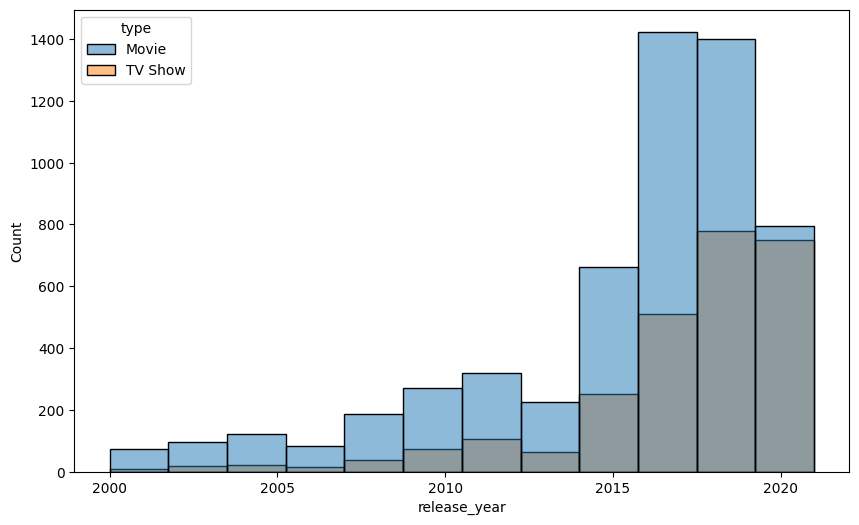

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data=filtered_df,x='release_year',bins = 12,hue='type')
plt.show()

### As we see, Netflix released over a 1400 movies between 2015 to 2020, but decreased a lot after 2020, but instead, released over 700 movies in the period between 2015 to 2020, but only decreased a bit after 2020.

### **2. Top 3 Genres?**

In [38]:
top_3_genre = genre_df[['show_id','Genre']]
top_3_genre.groupby('Genre')['show_id'].nunique().sort_values(ascending=False).iloc[0:3]

,show_id
Genre,
International Movies,2752
Dramas,2427
Comedies,1674


### The Top 3 Genres are **International Movies**, **Dramas**, **Comedies**.

### **3. Actor with most number of movies?**

In [39]:
cast_df['cast_names'].value_counts().iloc[1:2] #To get the number of films each actor/actress have worked in

,count
cast_names,
Anupam Kher,43


**There are 'Unknown_cast' at top of number of movies, one did, therefore getting index at [2], to get the actor with most number of movies.**

### Hence we can see that actor with most number of movies is **Anupam Kher**.

### **4. Actor - Director pair with most number of productions**

In [40]:
director_df.value_counts(subset=['director_names', 'cast_names']).reset_index(name='count').sort_values(by='count', ascending=False).iloc[2:4]

,director_names,cast_names,count
2,Rajiv Chilaka,Rajesh Kava,19
3,Rajiv Chilaka,Julie Tejwani,19


**1st two entries are with unknown director and cast therefore taking from 3rd entry into count.**

### Here we can see the actor-director pair with most number of productions is **Rajiv Chilika** and **Rajesh Kava**. Also **Rajiv Chilika** and **Julie Tejwani**.

### **5. What is the best time to launch a TV show?**

In [41]:
time_to_launch = df[df['type']=='TV Show']
time_to_launch.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown_director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown_country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown_director,Unknown_cast,Unknown_country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown_director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown_country,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [42]:
time_to_launch.loc[:,'date_day'] = time_to_launch['date_added'].dt.day
launch_day = time_to_launch['date_day'].value_counts()
launch_day.iloc[0:1]

<ipython-input-42-c70dc464bdf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_to_launch.loc[:,'date_day'] = time_to_launch['date_added'].dt.day


,count
date_day,
1,532


In [43]:
time_to_launch.loc[:,'date_month'] = time_to_launch['date_added'].dt.month
launch_month = time_to_launch['date_month'].value_counts()
launch_month.iloc[0:1]

<ipython-input-43-39da872c4f6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_to_launch.loc[:,'date_month'] = time_to_launch['date_added'].dt.month


,count
date_month,
12,266


### The best time to launch TV Shows is **1st** in days and **December** in month .

### **6. Movies and TV Shows duration distribution**

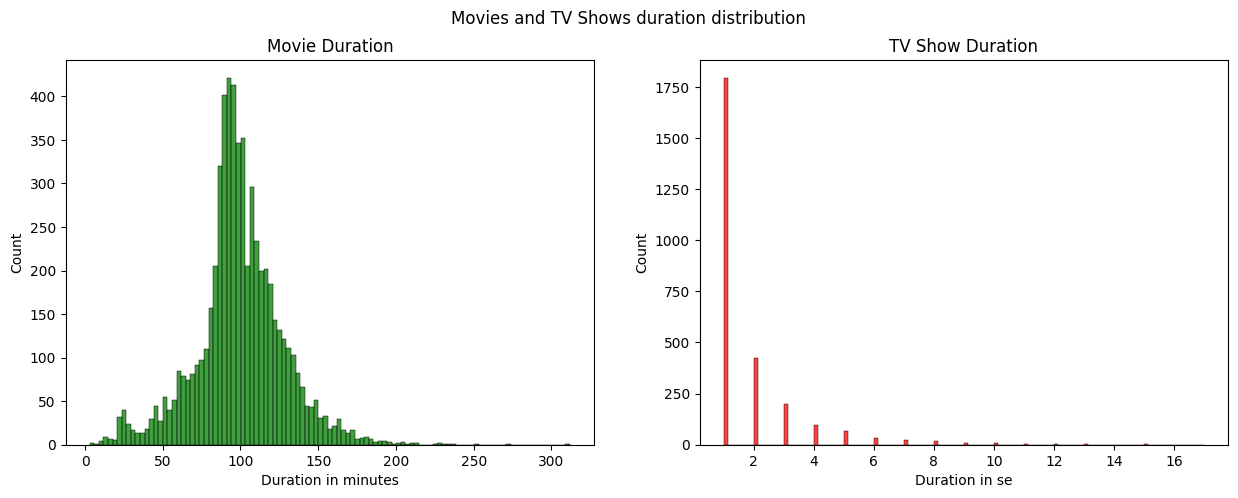

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df[df['type'] == 'Movie']['duration'],color='green')
plt.xlabel('Duration in minutes')
plt.title('Movie Duration')
plt.subplot(1,2,2)
sns.histplot(df[df['type'] == 'TV Show']['duration'],color='red')
plt.xlabel('Duration in se')
plt.title('TV Show Duration')
plt.suptitle('Movies and TV Shows duration distribution')
plt.show()

As we see majority of the movies are of **80 - 100** min of duration.
and TV Shows are of **1 season** of duration.

Suggested duration of Movies is **90 min** and of TV Shows is **1 season**.

### **7. Correlation Heatmap of Release Year and Duration of Movies and TV Shows**

In [45]:
mov_df = df[df['type']=='Movie']
TV_df = df[df['type']=='TV Show']

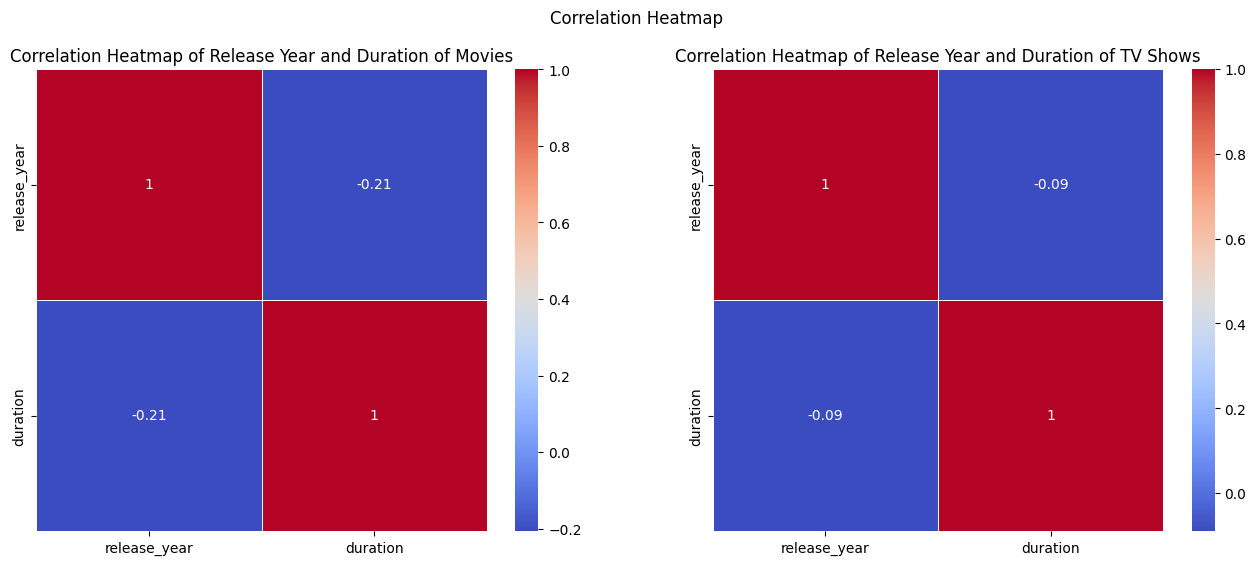

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
numerical_cols = mov_df[['release_year', 'duration']]
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Release Year and Duration of Movies')
plt.subplot(1,2,2)
numerical_cols = TV_df[['release_year', 'duration']]
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Release Year and Duration of TV Shows')
plt.suptitle ('Correlation Heatmap')
plt.show()

### Movies - There is a small trend where newer movies tend to be shorter in duration.
### TV Shows - The duration of TV shows has barely any correlation with their release year, meaning newer TV shows have a wide variety of episode lengths, without any significant trend over time.

### **8. Top 10 directors who have appeared in most movies or TV shows**

In [47]:
director_df.groupby('director_names')['show_id'].nunique().sort_values(ascending=False).iloc[1:12] #Since 'Unknown_director' is at 1st index

,show_id
director_names,
Rajiv Chilaka,22
Jan Suter,21
Raúl Campos,19
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,15
Cathy Garcia-Molina,13
Youssef Chahine,12
Jay Chapman,12


### Above are the top 10 directors

### **9. Actor Popularity by Release Year**

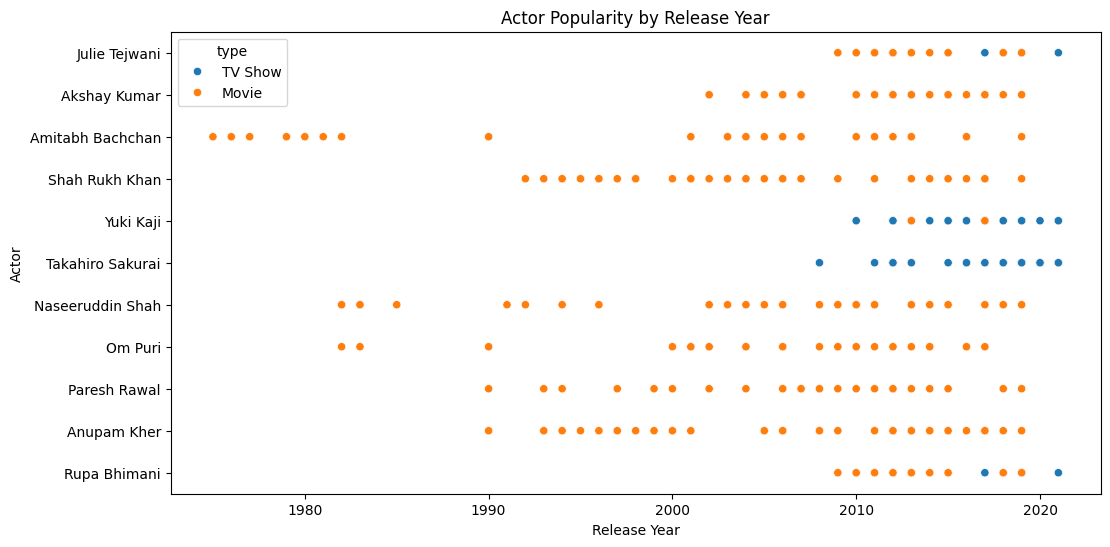

In [48]:
cast_index = cast_df.groupby('cast_names')['show_id'].nunique().sort_values(ascending=False).iloc[1:12].index #Since 'Unknown_director' is at 1st index
cast_release_df = cast_df[cast_df['cast_names'].isin(cast_index)]
plt.figure(figsize=(12,6))
sns.scatterplot(x='release_year', y='cast_names', data=cast_release_df, hue='type')
plt.title('Actor Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Actor')
plt.show()

### Yuki Kaji and Takahiro Sakurai have gained popularityin TV Shows by the last decade ie. from 2010 - 2021.
### Amitabh Bachchan has been popular in movies since 1975.
### Rupa Bhimani and Julie Tejwani have also gained popularity in both the content by 2009 upto 2021.


### **10. Release Year vs. Number of Seasons (For TV Shows)**

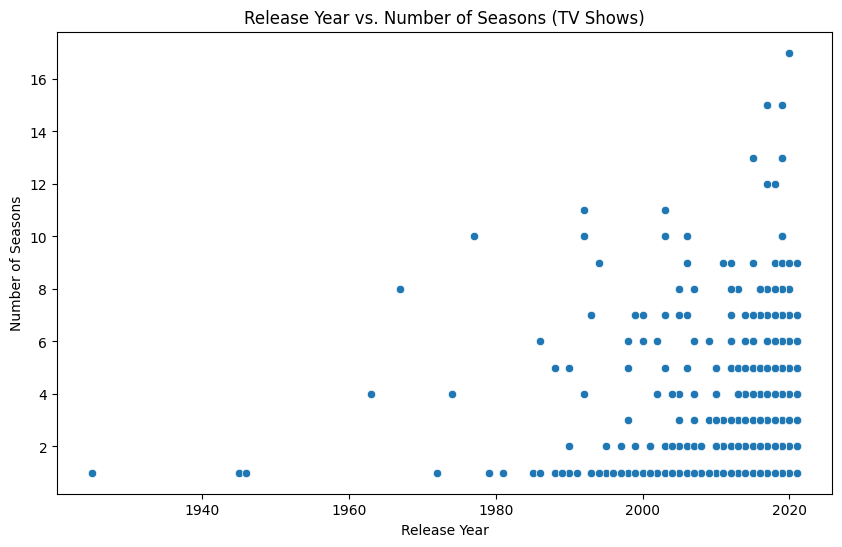

In [49]:
df_tv_shows = df[df['type'] == 'TV Show']
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_tv_shows, x='release_year', y='duration')
plt.title('Release Year vs. Number of Seasons (TV Shows)')
plt.xlabel('Release Year')
plt.ylabel('Number of Seasons')
plt.show()

In recent years, Tv Shows have nominal 8-9 number of seasons at most and have 1 season at least.

### **11. Release Year Distribution by Type**

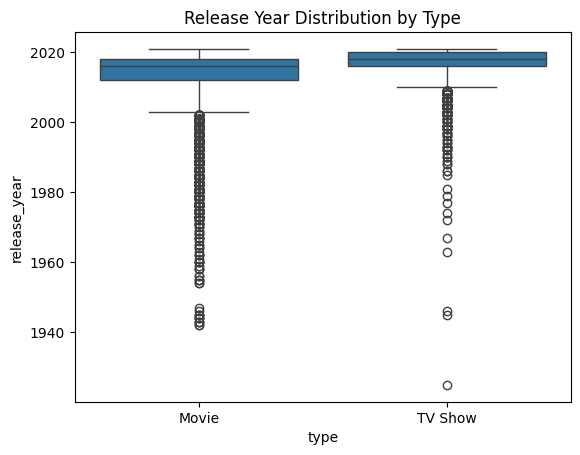

In [50]:
sns.boxplot(data=df, x='type', y='release_year')
plt.title('Release Year Distribution by Type')
plt.show()

There is majority number of outliers in Movies as compared to TV Shows, 75% of movies are released in approx 2011 and 75% of TV Shows are released in 2015 approx.

# Recommendations

### 1. Continue investing in popular genres such as **International Movies**, **Dramas**, **Comedies** to cater to global audiences.
### 2. Since the majority of content consumed is between **90-120 minutes for movies** and **1 season for the TV Shows**, producing movies with this runtime could boost engagement.
### 3. Plan releases around peak times (e.g., first week of winter months for new TV shows and movies), around **1st December** would be most appropriate date.
### 4. Try releasing movies with actors such as **Shahrukh Khan** and **Anupam Kher**, and directors such as **Rajiv Chilaka** and **Jan Suter** to increase the screen time of Audience.
### 5. Focus on adding Movies and Tv Shows which are released recently as 75% of content added are of 2011-2015.





